# Proyecto: Resolviendo un problema con clustering

## Preparar datos para clusterizar

### Importar librerias

In [1]:
import numpy as np
import pandas as pd
from itertools import product

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.neighbors import NearestNeighbors

import warnings
warnings.filterwarnings('ignore')

### Carga de datos

In [2]:
df_country = pd.read_csv('../data/country-data.csv')
df_country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [4]:
df_country.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


#### Valores nulos

In [5]:
df_country.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

#### Valores duplicados

In [6]:
df_country[df_country.duplicated()]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


#### Análisis de distribución

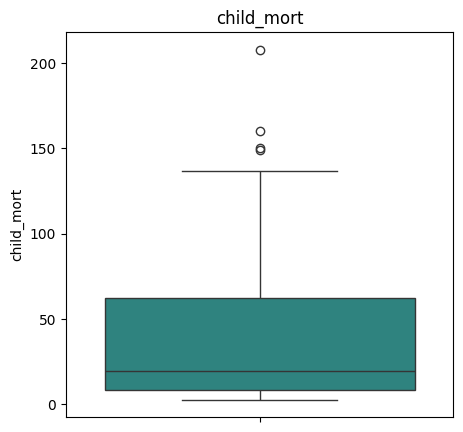

                      country  child_mort  exports  health  imports  income  \
66                      Haiti       208.0     15.3    6.91     64.7    1500   
132              Sierra Leone       160.0     16.8   13.10     34.5    1220   
32                       Chad       150.0     36.8    4.53     43.5    1930   
31   Central African Republic       149.0     11.8    3.98     26.5     888   
97                       Mali       137.0     22.8    4.98     35.1    1870   

     inflation  life_expec  total_fer  gdpp  
66        5.45        32.1       3.33   662  
132      17.20        55.0       5.20   399  
32        6.39        56.5       6.59   897  
31        2.01        47.5       5.21   446  
97        4.37        59.5       6.55   708  


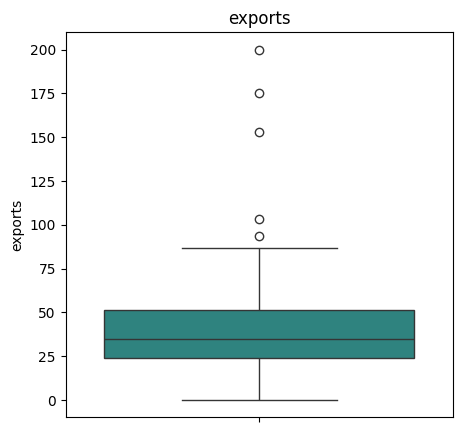

        country  child_mort  exports  health  imports  income  inflation  \
133   Singapore         2.8    200.0    3.96    174.0   72100     -0.046   
91   Luxembourg         2.8    175.0    7.77    142.0   91700      3.620   
98        Malta         6.8    153.0    8.65    154.0   28300      3.830   
73      Ireland         4.2    103.0    9.19     86.5   45700     -3.220   
131  Seychelles        14.4     93.8    3.40    108.0   20400     -4.210   

     life_expec  total_fer    gdpp  
133        82.7       1.15   46600  
91         81.3       1.63  105000  
98         80.3       1.36   21100  
73         80.4       2.05   48700  
131        73.4       2.17   10800  


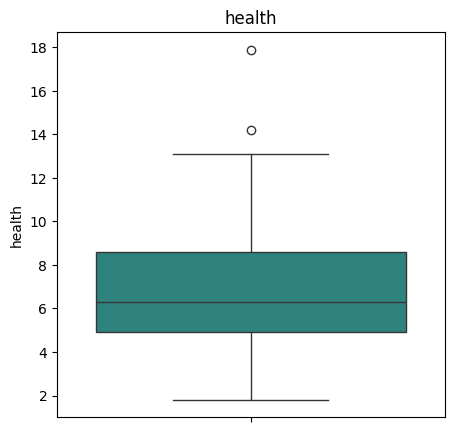

                   country  child_mort  exports  health  imports  income  \
159          United States         7.3     12.4    17.9     15.8   49400   
101  Micronesia, Fed. Sts.        40.0     23.5    14.2     81.0    3340   
132           Sierra Leone       160.0     16.8    13.1     34.5    1220   
110            Netherlands         4.5     72.0    11.9     63.6   45500   
54                  France         4.2     26.8    11.9     28.1   36900   

     inflation  life_expec  total_fer   gdpp  
159      1.220        78.7       1.93  48400  
101      3.800        65.4       3.46   2860  
132     17.200        55.0       5.20    399  
110      0.848        80.7       1.79  50300  
54       1.050        81.4       2.03  40600  


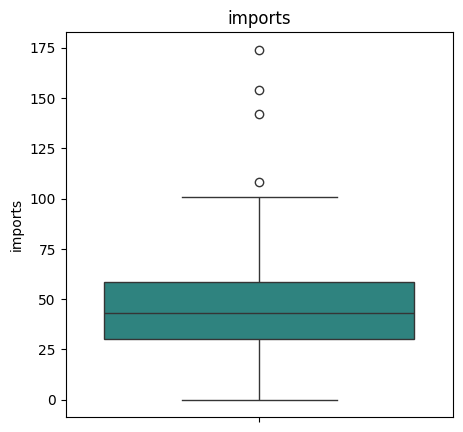

        country  child_mort  exports  health  imports  income  inflation  \
133   Singapore         2.8    200.0    3.96    174.0   72100     -0.046   
98        Malta         6.8    153.0    8.65    154.0   28300      3.830   
91   Luxembourg         2.8    175.0    7.77    142.0   91700      3.620   
131  Seychelles        14.4     93.8    3.40    108.0   20400     -4.210   
87      Lesotho        99.7     39.4   11.10    101.0    2380      4.150   

     life_expec  total_fer    gdpp  
133        82.7       1.15   46600  
98         80.3       1.36   21100  
91         81.3       1.63  105000  
131        73.4       2.17   10800  
87         46.5       3.30    1170  


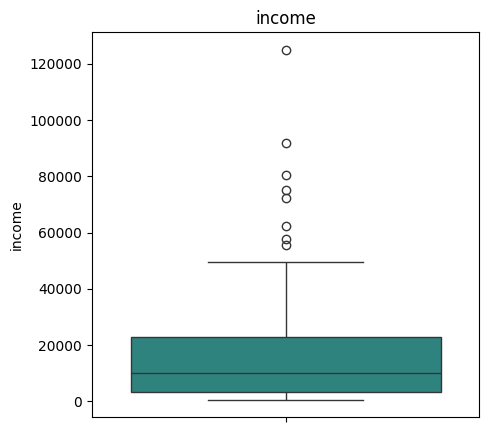

        country  child_mort  exports  health  imports  income  inflation  \
123       Qatar         9.0     62.3    1.81     23.8  125000      6.980   
91   Luxembourg         2.8    175.0    7.77    142.0   91700      3.620   
23       Brunei        10.5     67.4    2.84     28.0   80600     16.700   
82       Kuwait        10.8     66.7    2.63     30.4   75200     11.200   
133   Singapore         2.8    200.0    3.96    174.0   72100     -0.046   

     life_expec  total_fer    gdpp  
123        79.5       2.07   70300  
91         81.3       1.63  105000  
23         77.1       1.84   35300  
82         78.2       2.21   38500  
133        82.7       1.15   46600  


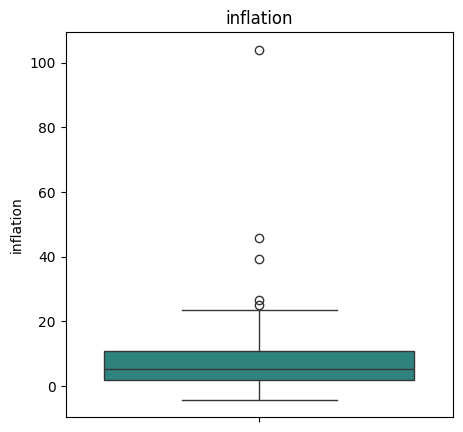

               country  child_mort  exports  health  imports  income  \
113            Nigeria       130.0     25.3    5.07     17.4    5150   
163          Venezuela        17.1     28.5    4.91     17.6   16500   
103           Mongolia        26.1     46.7    5.44     56.7    7710   
149        Timor-Leste        62.6      2.2    9.12     27.8    1850   
49   Equatorial Guinea       111.0     85.8    4.48     58.9   33700   

     inflation  life_expec  total_fer   gdpp  
113      104.0        60.5       5.84   2330  
163       45.9        75.4       2.47  13500  
103       39.2        66.2       2.64   2650  
149       26.5        71.1       6.23   3600  
49        24.9        60.9       5.21  17100  


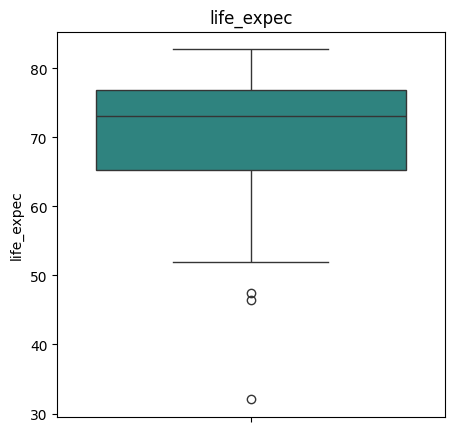

         country  child_mort  exports  health  imports  income  inflation  \
77         Japan         3.2     15.0    9.49     13.6   35800     -1.900   
133    Singapore         2.8    200.0    3.96    174.0   72100     -0.046   
145  Switzerland         4.5     64.0   11.50     53.3   55500      0.317   
68       Iceland         2.6     53.4    9.40     43.3   38800      5.470   
7      Australia         4.8     19.8    8.73     20.9   41400      1.160   

     life_expec  total_fer   gdpp  
77         82.8       1.39  44500  
133        82.7       1.15  46600  
145        82.2       1.52  74600  
68         82.0       2.20  41900  
7          82.0       1.93  51900  


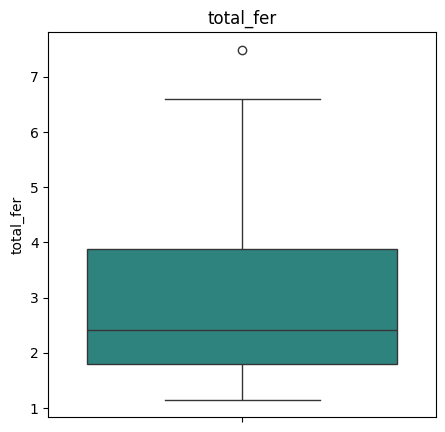

              country  child_mort  exports  health  imports  income  \
112             Niger       123.0    22.20    5.16     49.1     814   
32               Chad       150.0    36.80    4.53     43.5    1930   
97               Mali       137.0    22.80    4.98     35.1    1870   
37   Congo, Dem. Rep.       116.0    41.10    7.91     49.6     609   
26            Burundi        93.6     8.92   11.60     39.2     764   

     inflation  life_expec  total_fer  gdpp  
112       2.55        58.8       7.49   348  
32        6.39        56.5       6.59   897  
97        4.37        59.5       6.55   708  
37       20.80        57.5       6.54   334  
26       12.30        57.7       6.26   231  


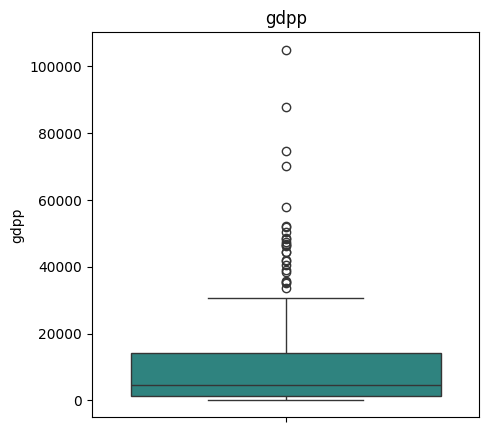

         country  child_mort  exports  health  imports  income  inflation  \
91    Luxembourg         2.8    175.0    7.77    142.0   91700      3.620   
114       Norway         3.2     39.7    9.48     28.5   62300      5.950   
145  Switzerland         4.5     64.0   11.50     53.3   55500      0.317   
123        Qatar         9.0     62.3    1.81     23.8  125000      6.980   
44       Denmark         4.1     50.5   11.40     43.6   44000      3.220   

     life_expec  total_fer    gdpp  
91         81.3       1.63  105000  
114        81.0       1.95   87800  
145        82.2       1.52   74600  
123        79.5       2.07   70300  
44         79.5       1.87   58000  


In [7]:
num_cols = df_country.select_dtypes(include=np.number).columns
for num_col in num_cols:
    plt.figure(figsize=(5, 5))
    sns.boxplot(data=df_country, y=num_col, palette='viridis')
    plt.title(num_col)
    plt.show()

    print(df_country.sort_values(by=num_col, ascending=False).head())

### Correlaciones

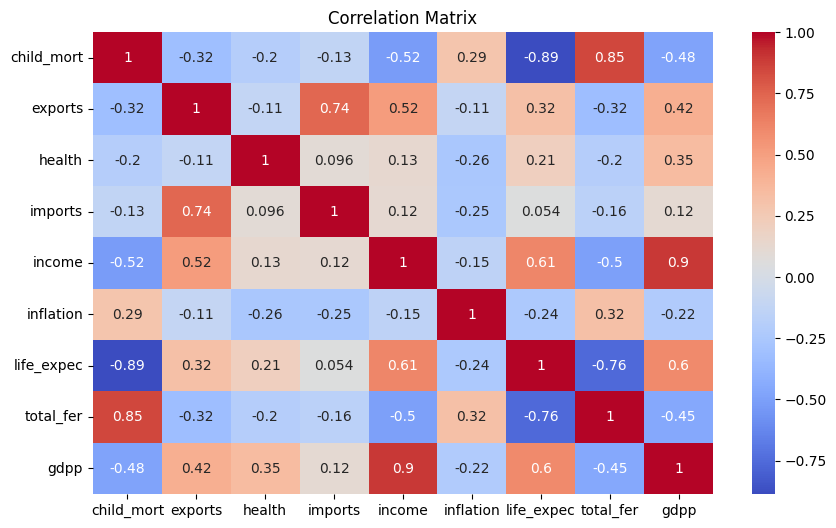

In [8]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_country.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Escalar los datos

In [9]:
# Scaling the data
scaler = StandardScaler()
df_country_scaled = scaler.fit_transform(df_country.drop('country', axis=1))

In [10]:
df_country_scaled

array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.62954556]])

## Aplicando PCA para clustering

In [11]:
df_country_scaled = pd.DataFrame(df_country_scaled, columns=df_country.drop('country', axis=1).columns)
df_country_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


In [12]:
pca = PCA()
pca.fit(df_country_scaled)
pca_data_scaled = pca.transform(df_country_scaled)
pca_data_scaled

array([[-2.91302459,  0.09562058, -0.7181185 , ...,  0.38300026,
         0.41507602, -0.01414844],
       [ 0.42991133, -0.58815567, -0.3334855 , ...,  0.24891887,
        -0.22104247,  0.17331578],
       [-0.28522508, -0.45517441,  1.22150481, ..., -0.08721359,
        -0.18416209,  0.08403718],
       ...,
       [ 0.49852439,  1.39074432, -0.23852611, ..., -0.14362677,
        -0.21759009, -0.03652231],
       [-1.88745106, -0.10945301,  1.10975159, ...,  0.06025631,
         0.08949452, -0.09604924],
       [-2.86406392,  0.48599799,  0.22316658, ..., -0.44218462,
         0.66433809, -0.44148176]])

In [13]:
# Indice de varianza
var = pca.explained_variance_ratio_
print(var)

[0.4595174  0.17181626 0.13004259 0.11053162 0.07340211 0.02484235
 0.0126043  0.00981282 0.00743056]


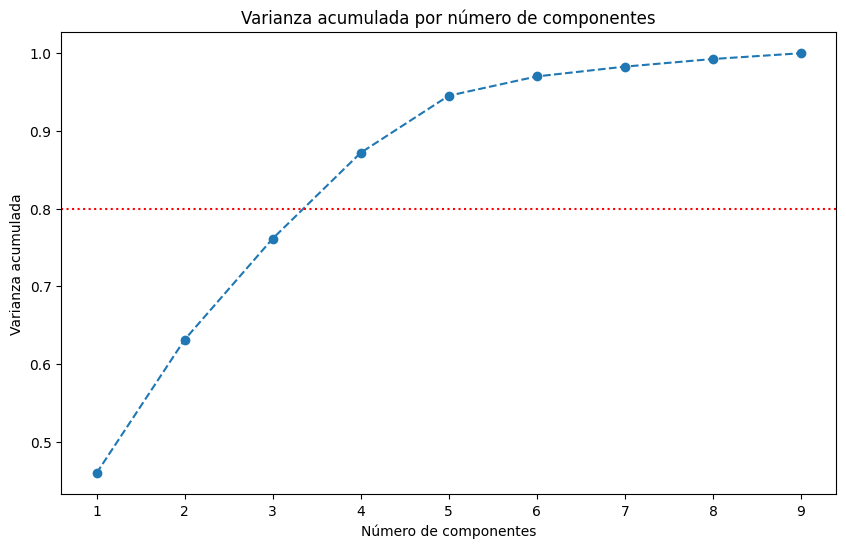

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(var) + 1), var.cumsum(), marker='o', linestyle='--')
plt.axhline(y=0.80, color='r', linestyle=':')
plt.title('Varianza acumulada por número de componentes')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza acumulada')
plt.show()

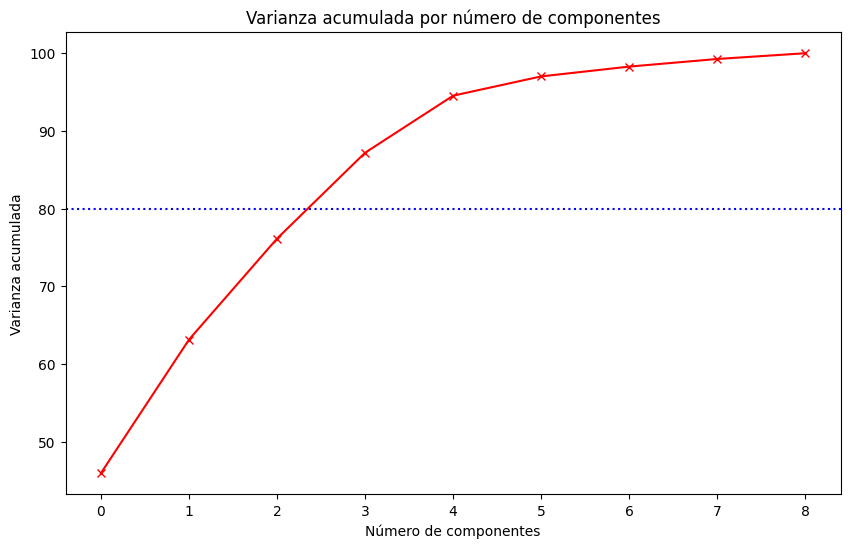

In [15]:
cum_var = np.cumsum(np.round(var, decimals=4) * 100)
plt.figure(figsize=(10, 6))
plt.plot(cum_var, 'r-x')
plt.axhline(y=80, color='b', linestyle=':')
plt.title('Varianza acumulada por número de componentes')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza acumulada')
plt.show()

In [16]:
pca_data_scaled = pd.DataFrame(pca_data_scaled)
pca_data_scaled.drop([4,5,6,7,8], axis=1, inplace=True)
pca_data_scaled.head()

,0,1,2,3
0,-2.913025,0.095621,-0.718118,1.005255
1,0.429911,-0.588156,-0.333486,-1.161059
2,-0.285225,-0.455174,1.221505,-0.868115
3,-2.932423,1.695555,1.525044,0.839625
4,1.033576,0.136659,-0.225721,-0.847063


## Resolviendo con K-means

### Con PCA

In [18]:
sum_of_squared_distances = []
silhouette_scores = []

k = range(2, 15)

for i in k:
    kmeans = KMeans(n_clusters=i, random_state=42)
    y_pred = kmeans.fit_predict(pca_data_scaled)
    kmeans.fit(pca_data_scaled)
    sum_of_squared_distances.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(pca_data_scaled, y_pred))

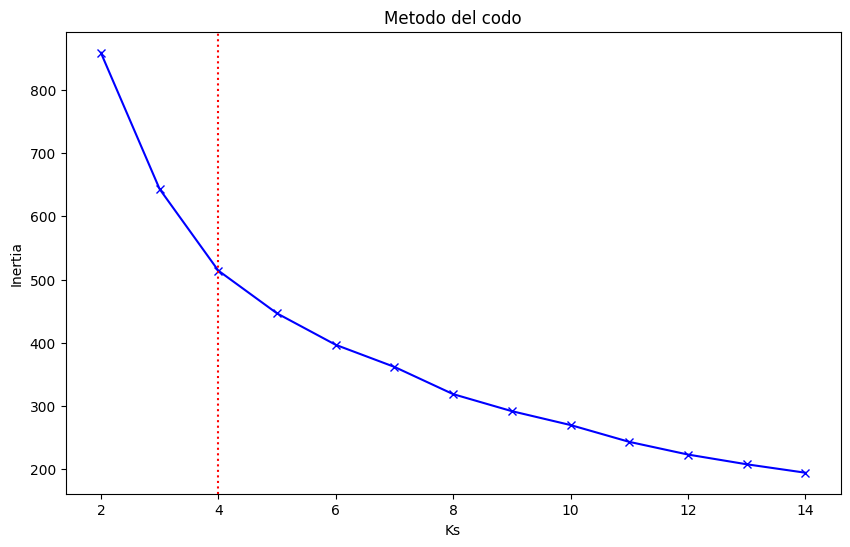

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(k, sum_of_squared_distances, 'bx-')
plt.axvline(x=4, color='r', linestyle=':')
plt.title('Metodo del codo')
plt.xlabel('Ks')
plt.ylabel('Inertia')
plt.show()

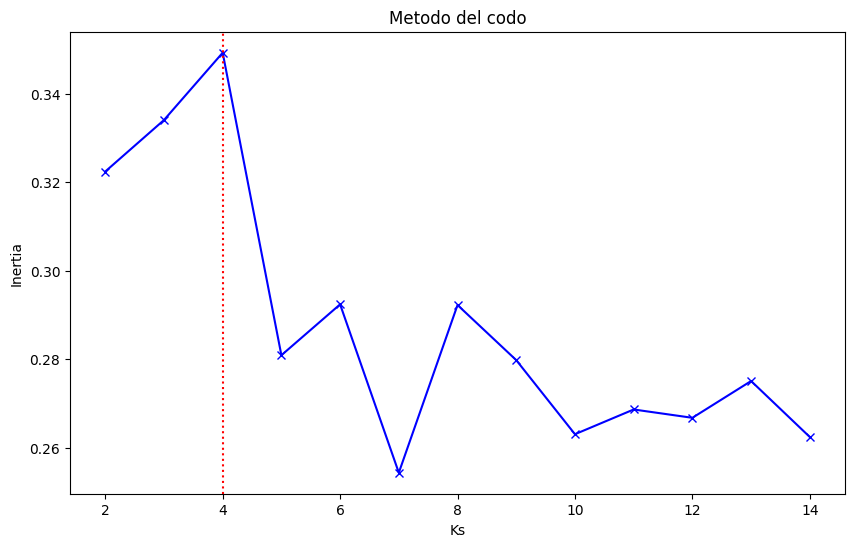

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(k, silhouette_scores, 'bx-')
plt.axvline(x=4, color='r', linestyle=':')
plt.title('Metodo del codo')
plt.xlabel('Ks')
plt.ylabel('Inertia')
plt.show()

### Sin PCA

In [21]:
kmeans = KMeans(n_clusters=4, random_state=42)
y_pred = kmeans.fit_predict(pca_data_scaled)
df_country['kmeans_pca'] = y_pred
print(round(silhouette_score(pca_data_scaled, y_pred), 3))
df_country.head()

0.349


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmeans_pca
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2


In [22]:
sum_of_squared_distances = []
silhouette_scores = []

k = range(2, 15)

for i in k:
    kmeans = KMeans(n_clusters=i, random_state=42)
    y_pred = kmeans.fit_predict(df_country_scaled)
    kmeans.fit(df_country_scaled)
    sum_of_squared_distances.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_country_scaled, y_pred))

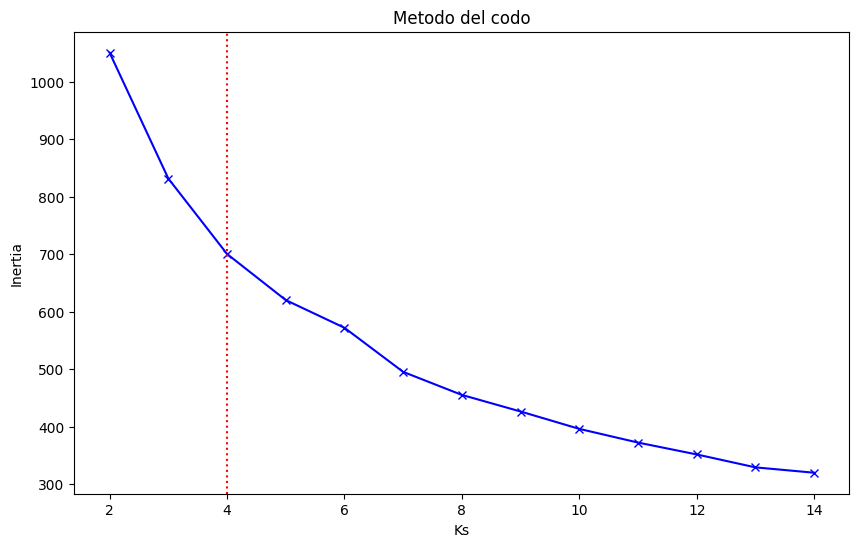

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(k, sum_of_squared_distances, 'bx-')
plt.axvline(x=4, color='r', linestyle=':')
plt.title('Metodo del codo')
plt.xlabel('Ks')
plt.ylabel('Inertia')
plt.show()

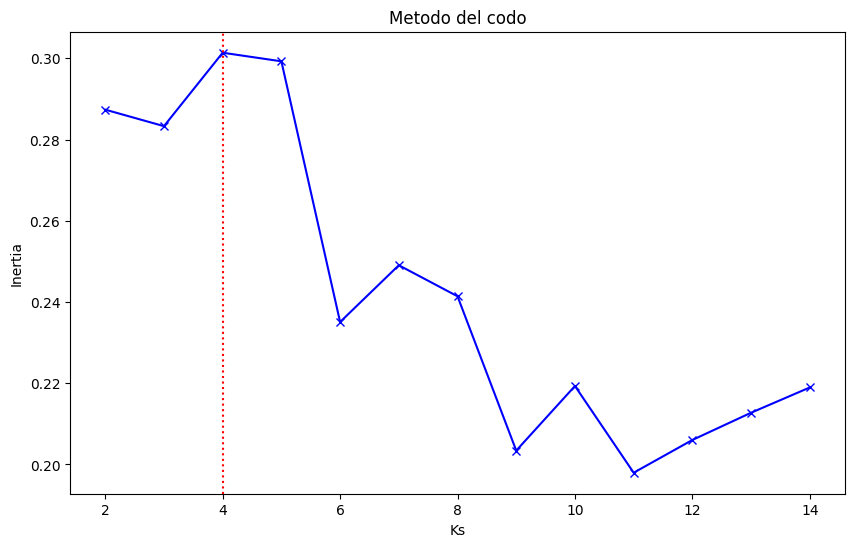

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(k, silhouette_scores, 'bx-')
plt.axvline(x=4, color='r', linestyle=':')
plt.title('Metodo del codo')
plt.xlabel('Ks')
plt.ylabel('Inertia')
plt.show()

In [25]:
kmeans = KMeans(n_clusters=4, random_state=42)
y_pred = kmeans.fit_predict(df_country_scaled)
df_country['kmeans'] = y_pred
print(round(silhouette_score(df_country_scaled, y_pred), 3))
df_country.head()

0.301


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmeans_pca,kmeans
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2,0


## Resolviendo con hierarchical clustering

### Con PCA

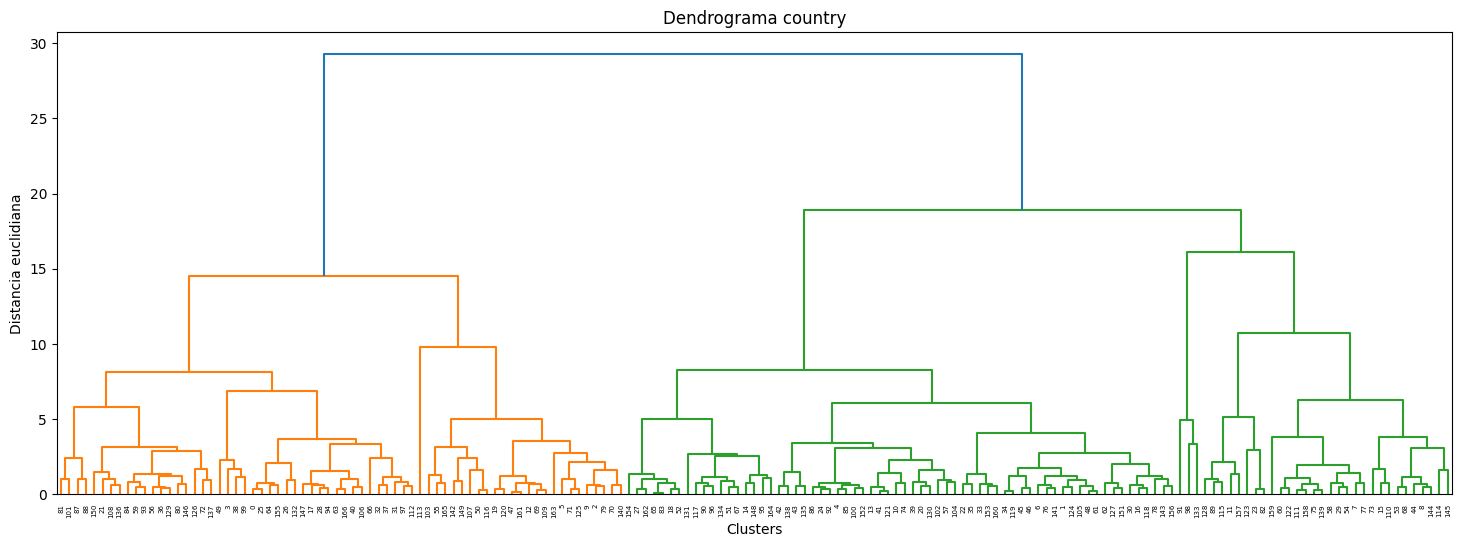

In [26]:
plt.figure(figsize=(18, 6))
dendrogram_plot = dendrogram(linkage(pca_data_scaled, method='ward'))
plt.title('Dendrograma country')
plt.xlabel('Clusters')
plt.ylabel('Distancia euclidiana')
plt.show()

In [27]:
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
y_pred = model.fit_predict(pca_data_scaled)
df_country['agglomerative_pca'] = y_pred
print(round(silhouette_score(pca_data_scaled, y_pred), 3))
df_country.head()

0.307


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmeans_pca,kmeans,agglomerative_pca
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1,1,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2,0,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2,0,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1,1,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2,0,0


### Sin PCA

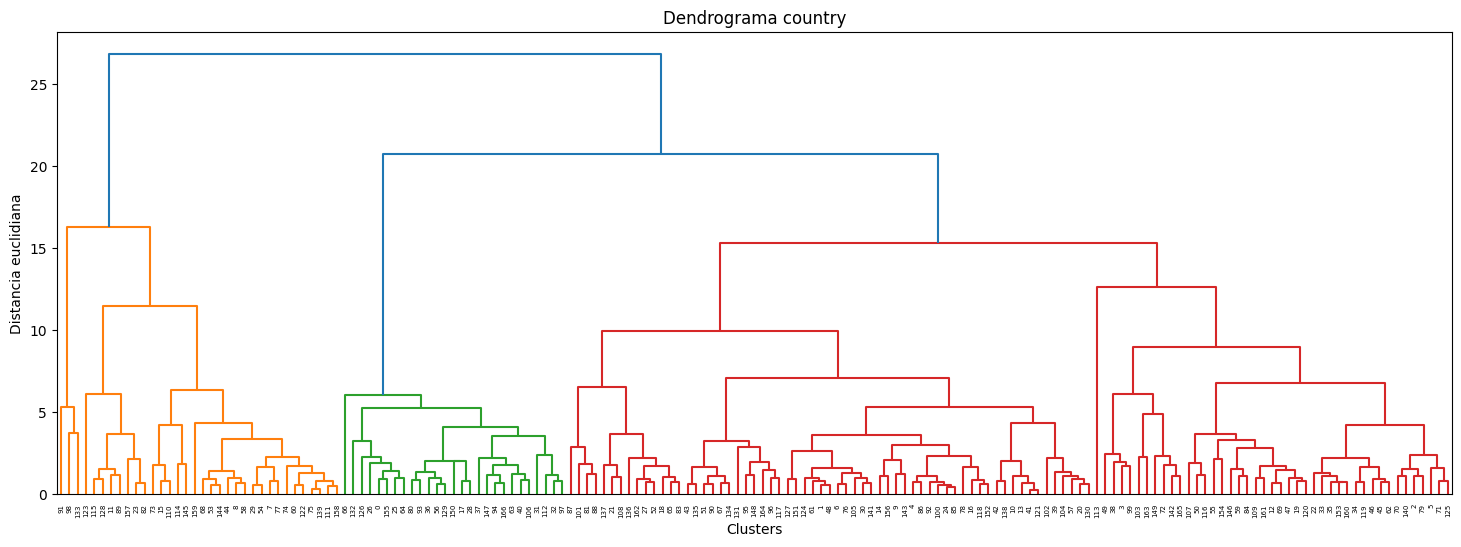

In [28]:
plt.figure(figsize=(18, 6))
dendrogram_plot = dendrogram(linkage(df_country_scaled, method='ward'))
plt.title('Dendrograma country')
plt.xlabel('Clusters')
plt.ylabel('Distancia euclidiana')
plt.show()

In [29]:
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
y_pred = model.fit_predict(df_country_scaled)
df_country['agglomerative'] = y_pred
print(round(silhouette_score(df_country_scaled, y_pred), 3))
df_country.head()

0.315


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmeans_pca,kmeans,agglomerative_pca,agglomerative
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1,1,1,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2,0,0,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2,0,1,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1,1,1,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2,0,0,0


## Resolviendo con DBSCAN

### Con PCA

In [30]:
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(pca_data_scaled)
distances, indices = neighbors_fit.kneighbors(pca_data_scaled)
distances = np.sort(distances, axis=0)
distances = distances[:, 1]

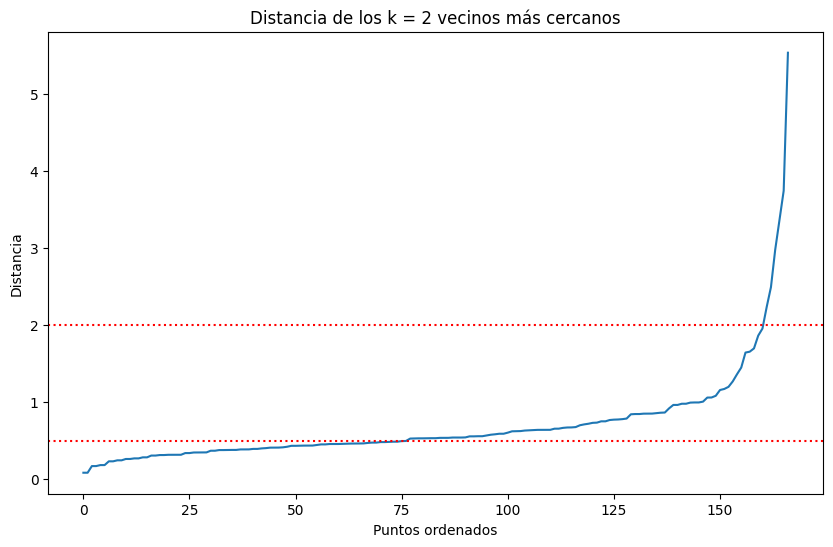

In [31]:
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title('Distancia de los k = 2 vecinos más cercanos')
plt.xlabel('Puntos ordenados')
plt.ylabel('Distancia')
plt.axhline(y=0.5, color='r', linestyle=':')
plt.axhline(y=2, color='r', linestyle=':')
plt.show()

In [32]:
eps_values = np.arange(0.5, 2.0, 0.1)
min_samples_values = range(3, 12)
dbscan_params = list(product(eps_values, min_samples_values))
cluster = []
silhouette_scores = []
for p in dbscan_params:
    dbscan = DBSCAN(eps=p[0], min_samples=p[1])
    y_pred = dbscan.fit_predict(pca_data_scaled)
    n_clusters = len(np.unique(y_pred))
    cluster.append(n_clusters)
    if n_clusters > 1:
        silhouette_scores.append(silhouette_score(pca_data_scaled, y_pred))
    else:
        silhouette_scores.append(None)

In [33]:
df_params = pd.DataFrame(dbscan_params, columns=['eps', 'min_samples'])
df_params['silhouette_score'] = silhouette_scores
df_params['n_clusters'] = cluster
df_params

,eps,min_samples,silhouette_score,n_clusters
0,0.5,3,-0.290614,8
1,0.5,4,-0.346912,8
2,0.5,5,-0.270847,3
3,0.5,6,-0.270847,3
4,0.5,7,-0.192021,2
...,...,...,...,...
130,1.9,7,0.508155,2
131,1.9,8,0.508155,2
132,1.9,9,0.508155,2
133,1.9,10,0.490310,2


In [34]:
pivot_1 = pd.pivot_table(df_params, values='silhouette_score', index='eps', columns='min_samples')
pivot_1.head()

min_samples,3,4,5,6,7,8,9,10,11
eps,,,,,,,,,
0.5,-0.290614,-0.346912,-0.270847,-0.270847,-0.192021,NaN,NaN,NaN,NaN
0.6,-0.153373,-0.189326,-0.213258,-0.204080,-0.171223,NaN,NaN,NaN,NaN
0.7,-0.183408,-0.012194,-0.066452,-0.109615,-0.075077,-0.176120,-0.151907,-0.167765,NaN
0.8,-0.133920,-0.077514,0.109937,-0.003871,-0.035975,0.026053,-0.023622,-0.042680,-0.092266
0.9,-0.165125,0.161053,0.153633,0.151308,0.132667,0.179129,0.169364,0.130852,0.055138


In [35]:
pivot_2 = pd.pivot_table(df_params, values='n_clusters', index='eps', columns='min_samples')
pivot_2.head()

min_samples,3,4,5,6,7,8,9,10,11
eps,,,,,,,,,
0.5,8,8,3,3,2,1,1,1,1
0.6,10,7,6,3,2,1,1,1,1
0.7,6,5,6,6,3,3,2,2,1
0.8,6,4,3,6,5,4,4,2,2
0.9,4,3,3,3,3,4,4,4,3


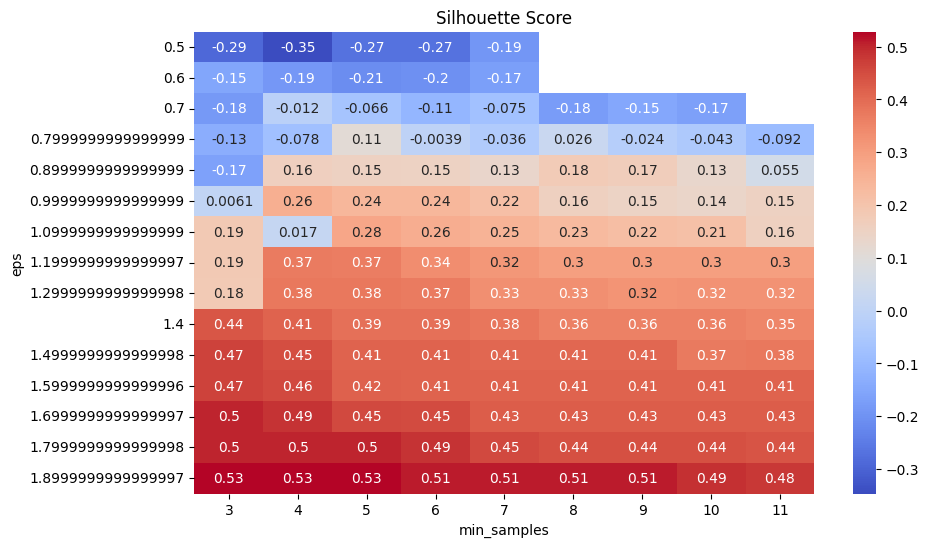

In [36]:
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_1, annot=True, annot_kws={'size':10} ,cmap='coolwarm')
plt.title('Silhouette Score')
plt.show()

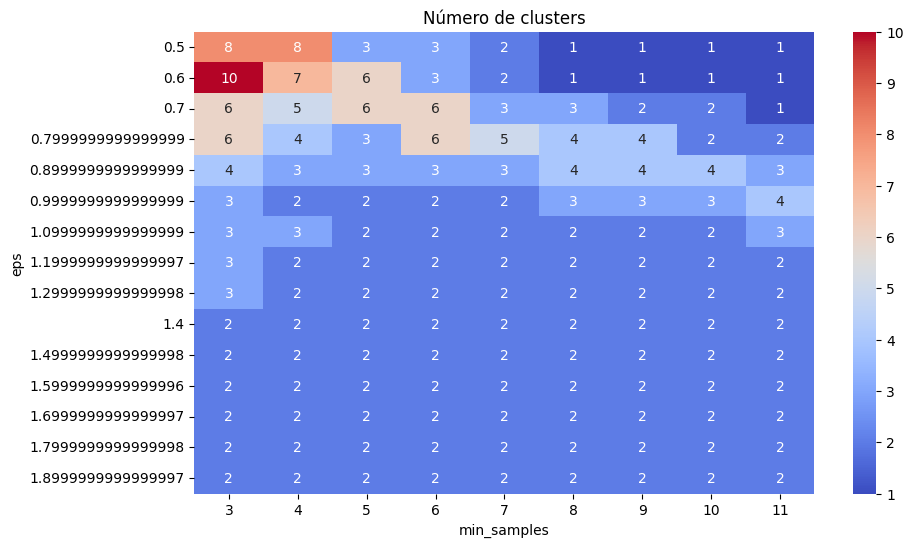

In [37]:
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_2, annot=True, annot_kws={'size':10} ,cmap='coolwarm')
plt.title('Número de clusters')
plt.show()

In [38]:
dbscan = DBSCAN(eps=1.3, min_samples=3).fit(pca_data_scaled)
y_pred = dbscan.fit_predict(pca_data_scaled)
df_country['dbscan_pca'] = y_pred
print(round(silhouette_score(pca_data_scaled, y_pred), 3))
df_country.head()

0.183


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmeans_pca,kmeans,agglomerative_pca,agglomerative,dbscan_pca
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1,1,1,0,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2,0,0,0,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2,0,1,0,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1,1,1,0,-1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2,0,0,0,0


### Sin PCA

In [39]:
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(df_country_scaled)
distances, indices = neighbors_fit.kneighbors(df_country_scaled)
distances = np.sort(distances, axis=0)
distances = distances[:, 1]

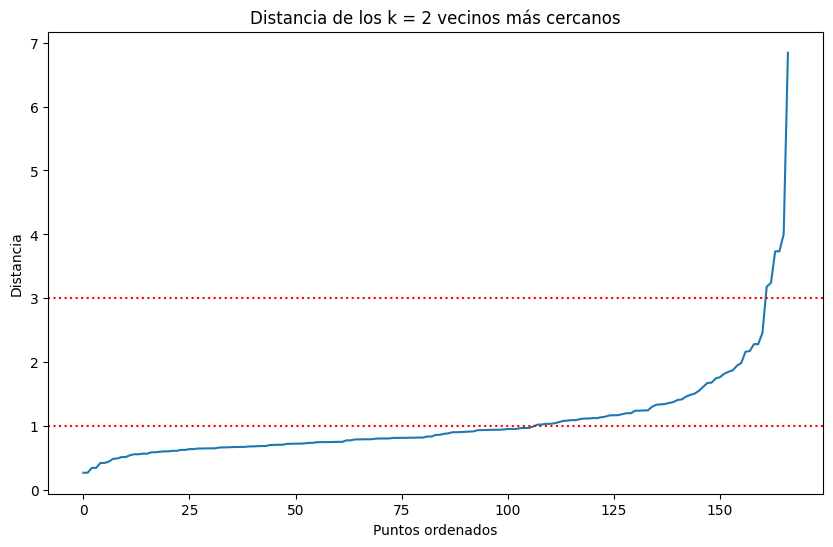

In [40]:
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title('Distancia de los k = 2 vecinos más cercanos')
plt.xlabel('Puntos ordenados')
plt.ylabel('Distancia')
plt.axhline(y=1, color='r', linestyle=':')
plt.axhline(y=3, color='r', linestyle=':')
plt.show()

In [41]:
veps_values = np.arange(1, 3, 0.1)
min_samples_values = range(3, 12)
dbscan_params = list(product(eps_values, min_samples_values))
cluster = []
silhouette_scores = []
for p in dbscan_params:
    dbscan = DBSCAN(eps=p[0], min_samples=p[1])
    y_pred = dbscan.fit_predict(df_country_scaled)
    n_clusters = len(np.unique(y_pred))
    cluster.append(n_clusters)
    if n_clusters > 1:
        silhouette_scores.append(silhouette_score(df_country_scaled, y_pred))
    else:
        silhouette_scores.append(None)

In [42]:
df_params = pd.DataFrame(dbscan_params, columns=['eps', 'min_samples'])
df_params['silhouette_score'] = silhouette_scores
df_params['n_clusters'] = cluster
df_params

,eps,min_samples,silhouette_score,n_clusters
0,0.5,3,-0.005933,2
1,0.5,4,NaN,1
2,0.5,5,NaN,1
3,0.5,6,NaN,1
4,0.5,7,NaN,1
...,...,...,...,...
130,1.9,7,0.365482,2
131,1.9,8,0.365482,2
132,1.9,9,0.351380,2
133,1.9,10,0.340577,2


In [43]:
pivot_1 = pd.pivot_table(df_params, values='silhouette_score', index='eps', columns='min_samples')
pivot_1.head()

min_samples,3,4,5,6,7,8,9,10,11
eps,,,,,,,,,
0.5,-0.005933,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.6,-0.234108,-0.221885,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.7,-0.324139,-0.227547,-0.217208,NaN,NaN,NaN,NaN,NaN,NaN
0.8,-0.240949,-0.206452,-0.245355,-0.196411,NaN,NaN,NaN,NaN,NaN
0.9,-0.134613,-0.100130,-0.044566,-0.205121,-0.217144,-0.156219,NaN,NaN,NaN


In [44]:
pivot_2 = pd.pivot_table(df_params, values='n_clusters', index='eps', columns='min_samples')
pivot_2.head()

min_samples,3,4,5,6,7,8,9,10,11
eps,,,,,,,,,
0.5,2,1,1,1,1,1,1,1,1
0.6,4,2,1,1,1,1,1,1,1
0.7,9,3,2,1,1,1,1,1,1
0.8,9,6,4,2,1,1,1,1,1
0.9,5,4,4,5,4,3,1,1,1


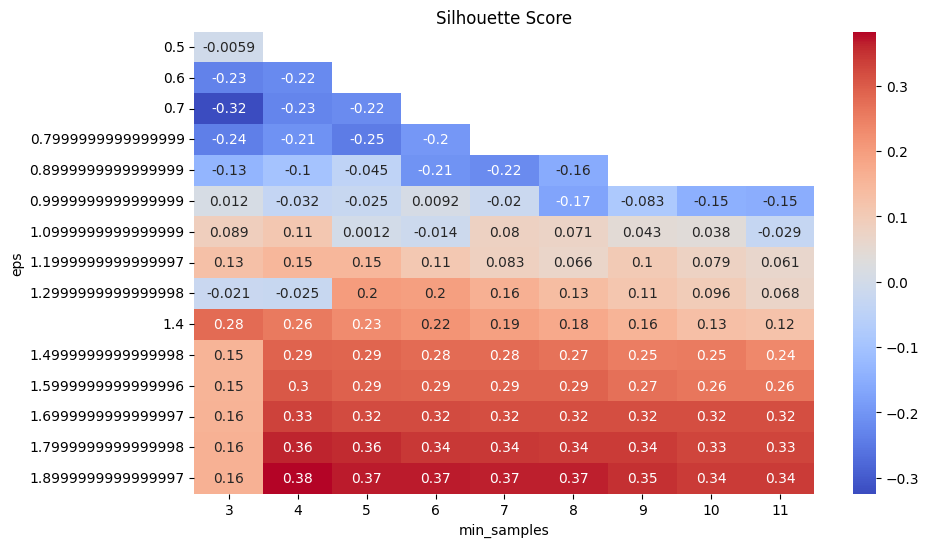

In [45]:
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_1, annot=True, annot_kws={'size':10} ,cmap='coolwarm')
plt.title('Silhouette Score')
plt.show()

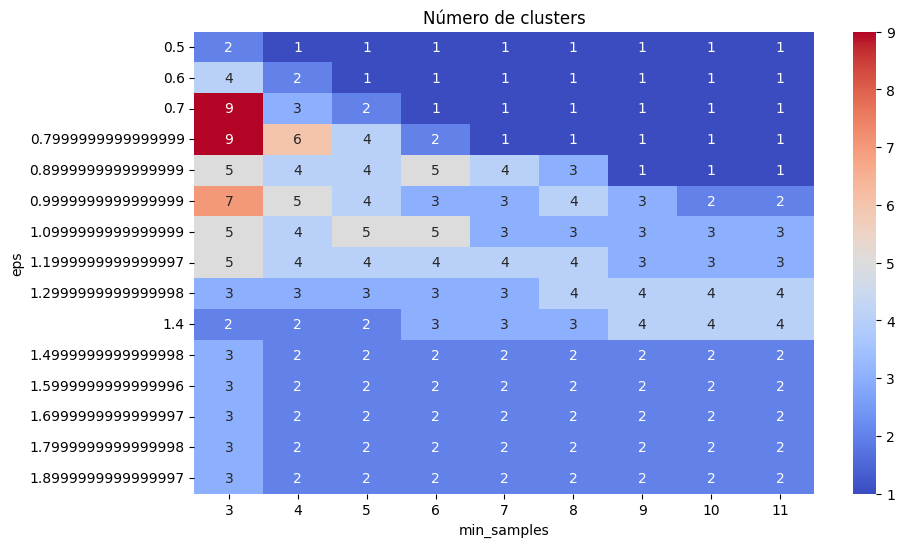

In [46]:
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_2, annot=True, annot_kws={'size':10} ,cmap='coolwarm')
plt.title('Número de clusters')
plt.show()

In [49]:
dbscan = DBSCAN(eps=1.7, min_samples=3).fit(df_country_scaled)
y_pred = dbscan.fit_predict(df_country_scaled)
df_country['dbscan'] = y_pred
print(round(silhouette_score(df_country_scaled, y_pred), 3))
df_country.head()

0.156


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmeans_pca,kmeans,agglomerative_pca,agglomerative,dbscan_pca,dbscan
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1,1,1,0,0,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2,0,0,0,0,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2,0,1,0,0,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1,1,1,0,-1,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2,0,0,0,0,0


## Evaluación de resultados de distintos modelos de clustering

In [53]:
df_country_numeric = df_country[['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp', 'kmeans_pca']]
df_country_numeric.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmeans_pca
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2


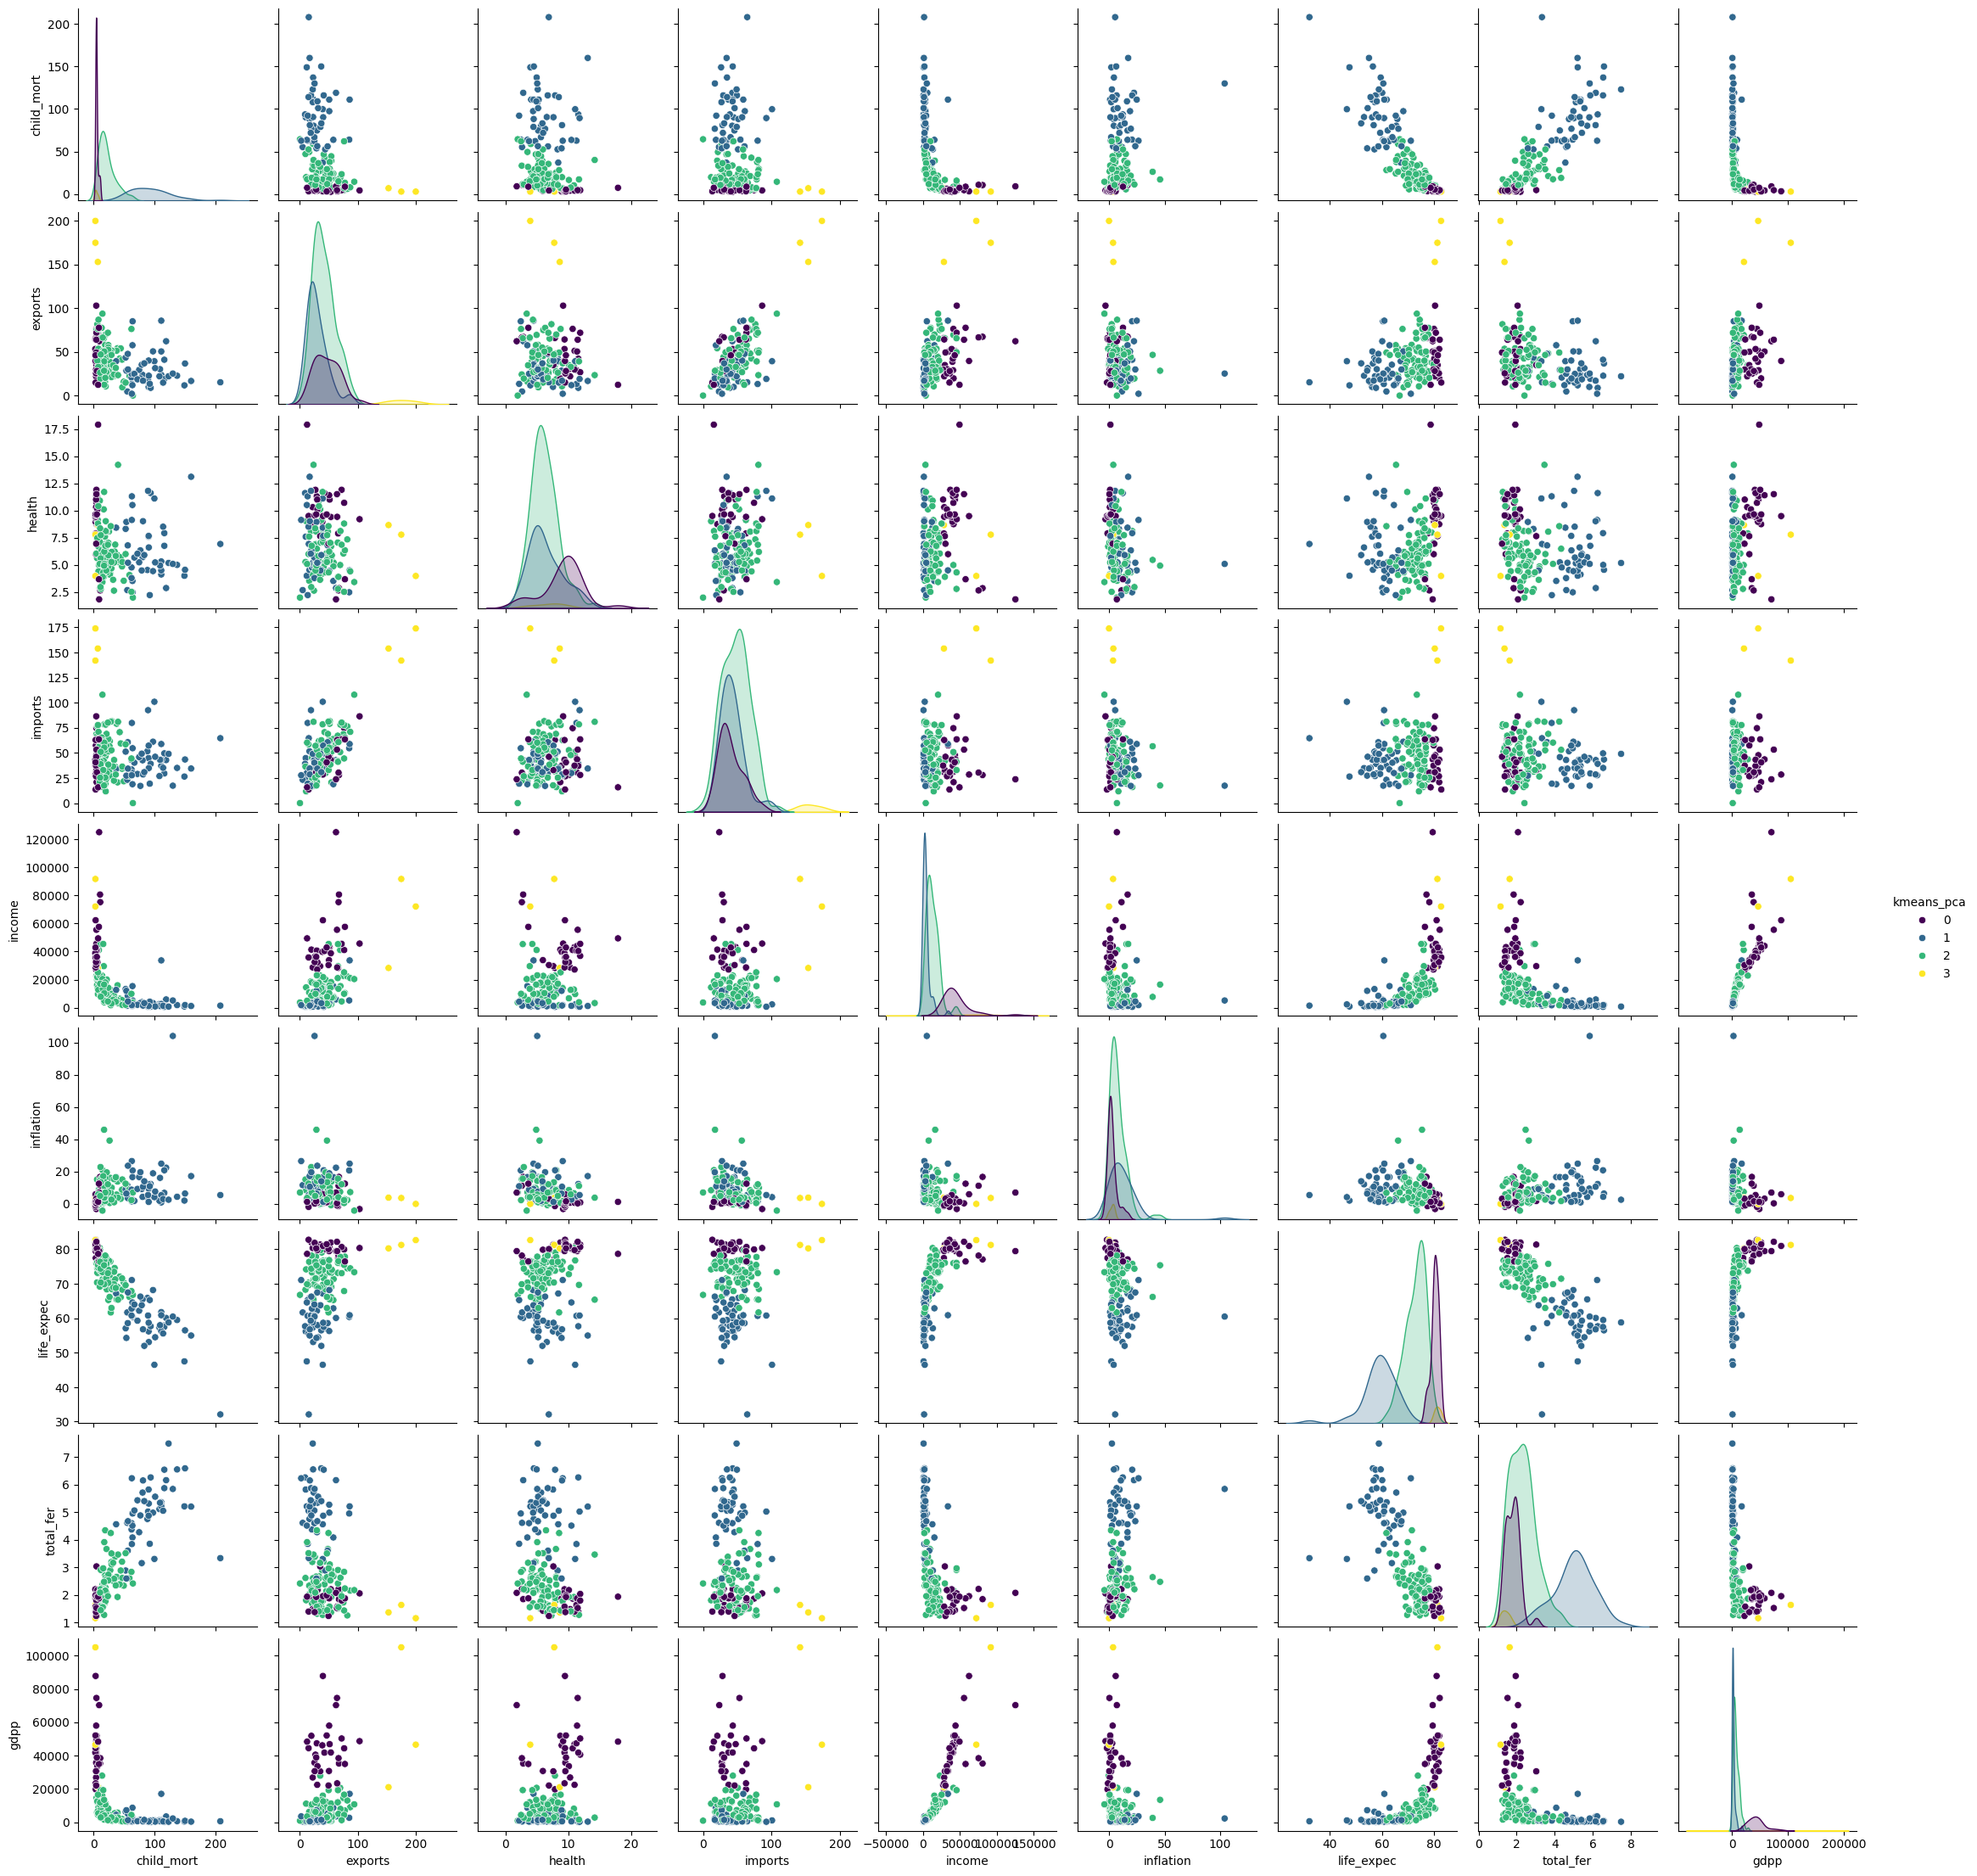

In [54]:
sns.pairplot(df_country_numeric, hue='kmeans_pca', palette='viridis')
plt.show()

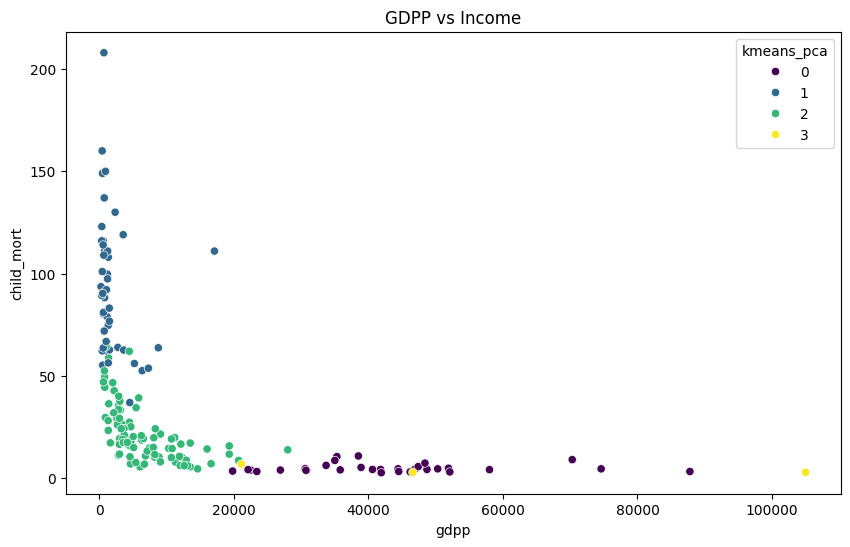

In [56]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='gdpp', y='child_mort', data=df_country, hue='kmeans_pca', palette='viridis')
plt.title('GDPP vs Income')
plt.show()

In [61]:
df_country[df_country['kmeans_pca'] == 0].head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmeans_pca,kmeans,agglomerative_pca,agglomerative,dbscan_pca,dbscan
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,0,2,0,1,0,0
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,0,2,0,1,0,0
15,Belgium,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400,0,2,0,1,0,0
23,Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300,0,2,0,1,-1,-1
29,Canada,5.6,29.1,11.30,31.0,40700,2.870,81.3,1.63,47400,0,2,0,1,0,0


In [62]:
df_country[df_country['kmeans_pca'] == 1].head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmeans_pca,kmeans,agglomerative_pca,agglomerative,dbscan_pca,dbscan
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,1,1,1,0,0,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,1,1,1,0,-1,0
17,Benin,111.0,23.8,4.10,37.2,1820,0.885,61.8,5.36,758,1,1,1,0,0,0
21,Botswana,52.5,43.6,8.30,51.3,13300,8.920,57.1,2.88,6350,1,1,1,0,0,0
25,Burkina Faso,116.0,19.2,6.74,29.6,1430,6.810,57.9,5.87,575,1,1,1,0,0,0


In [63]:
df_country[df_country['kmeans_pca'] == 2].head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmeans_pca,kmeans,agglomerative_pca,agglomerative,dbscan_pca,dbscan
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2,0,0,0,0,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2,0,1,0,0,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2,0,0,0,0,0
5,Argentina,14.5,18.9,8.10,16.0,18700,20.90,75.8,2.37,10300,2,0,1,0,0,0
6,Armenia,18.1,20.8,4.40,45.3,6700,7.77,73.3,1.69,3220,2,0,0,0,0,0


In [64]:
df_country[df_country['kmeans_pca'] == 3].head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmeans_pca,kmeans,agglomerative_pca,agglomerative,dbscan_pca,dbscan
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000,3,3,0,1,-1,-1
98,Malta,6.8,153.0,8.65,154.0,28300,3.830,80.3,1.36,21100,3,3,0,1,-1,-1
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600,3,3,0,1,-1,-1


In [66]:
import pycountry
import plotly.express as px

def get_alpha_3(location):
    try:
        return pycountry.countries.get(name=location).alpha_3
    except:
        return None

df_map = df_country.copy()
df_map['Code'] = df_country['country'].apply(lambda x: get_alpha_3(x))

fig = px.choropleth(df_map, locations='Code', color='kmeans', hover_name='country', color_continuous_scale=px.colors.sequential.Plasma)
fig.show()